In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import astropy
from astropy.io import votable

import pandas as pd

In [2]:
res = votable.parse("result.vot.gz")

In [3]:
table = res.get_first_table()
data = table.array

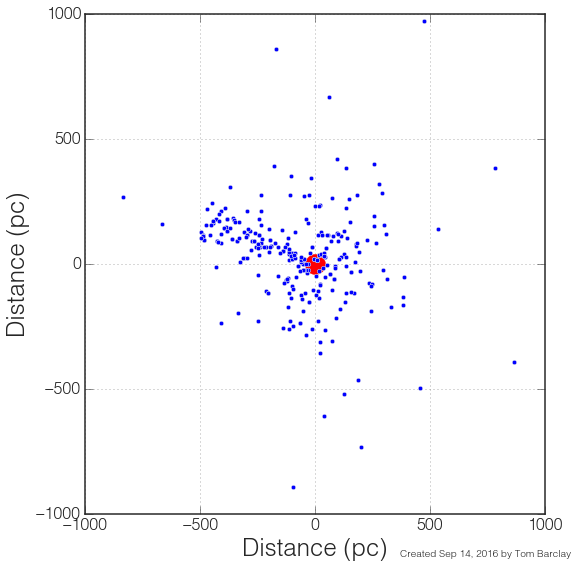

In [86]:
fig, ax1 = plt.subplots(1, 1, figsize=[8,8], sharex=False, sharey=False)

angle = data['ra']
dist = 1./(data['parallax']/1000.)
dist_uncmult = (data['parallax_error'] / data['parallax'])
dist_uncsysmult = ((data['parallax_error']**2+0.3**2)**0.5 / data['parallax'])
x = dist * np.sin(np.radians(angle))
x_unc = dist * dist_uncsysmult
y = dist * np.cos(np.radians(angle))
y_unc = dist * dist_uncsysmult 

ax1.scatter(0,0,s=400,color='red')
ax1.scatter(x,y)

#ax1.errorbar(x,y,x_unc,y_unc, fmt='.')


# for i,n in enumerate(data['pl_hostname']):
#     if 'epler' in n:
#         ax1.text(x[i],y[i],n)

ax1.set_xlim(-1000,1000)
ax1.set_ylim(-1000,1000)

ax1.set_xlabel('Distance (pc)')
ax1.set_ylabel('Distance (pc)')
ax1.grid()


ax1.text(370, -1170,'Created Sep 14, 2016 by Tom Barclay', fontsize=10)
fig.tight_layout()
#fig.savefig('exoplanets.png', dpi=200)

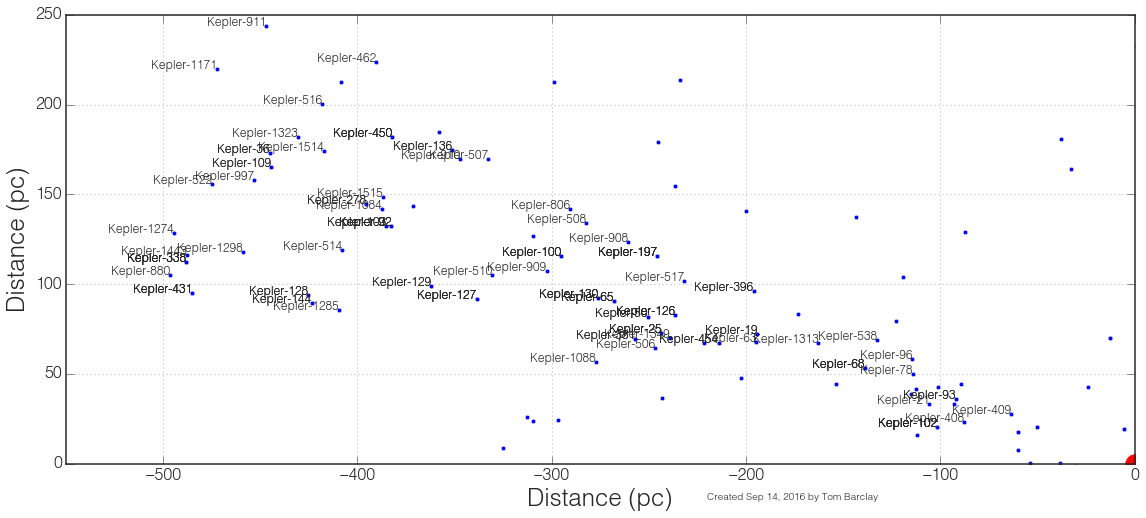

In [87]:
fig, ax1 = plt.subplots(1, 1, figsize=[16,7.3], sharex=False, sharey=False)

angle = data['ra']
dist = 1./(data['parallax']/1000.)
dist_uncmult = (data['parallax_error'] / data['parallax'])
dist_uncsysmult = ((data['parallax_error']**2+0.3**2)**0.5 / data['parallax'])
x = dist * np.sin(np.radians(angle))
x_unc = dist * dist_uncsysmult
y = dist * np.cos(np.radians(angle))
y_unc = dist * dist_uncsysmult 

ax1.scatter(0,0,s=400,color='red')
ax1.scatter(x,y)
#ax1.errorbar(x,y,x_unc,y_unc, fmt='.')


ax1.set_xlim(-550,0)
ax1.set_ylim(0,250)

for i,n in enumerate(data['pl_hostname']):
    if ('epler' in n) and (x[i] > -550):
        ax1.text(x[i],y[i],n,alpha=1,fontsize=12, horizontalalignment='right')
ax1.text(-220, -20,'Created Sep 14, 2016 by Tom Barclay', fontsize=10)
ax1.set_xlabel('Distance (pc)')
ax1.set_ylabel('Distance (pc)')
ax1.grid()



fig.tight_layout()
#fig.savefig('kepler.png', dpi=200)

In [88]:
keplers = [x for x in data['pl_hostname'] if 'epler' in x]

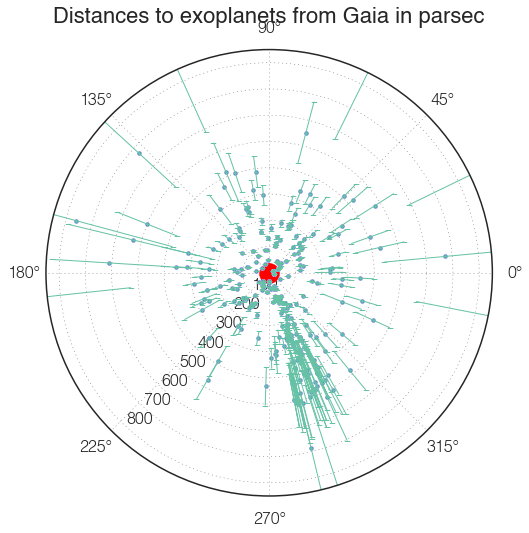

In [89]:
fig, ax1 = plt.subplots(1, 1, figsize=[8,8], sharex=False, sharey=False, subplot_kw=dict(projection='polar'))

angle = data['ra']
dist = 1./(data['parallax']/1000.)
dist_uncsys = dist * (np.sqrt(data['parallax_error']**2+0.3**2) / data['parallax'])
# dist_uncmult = (data['parallax_error'] / data['parallax'])
# dist_uncsysmult = ((data['parallax_error']+0.3) / data['parallax'])
# x = dist * np.sin(np.radians(angle))
# x_unc = dist * dist_uncsysmult
# y = dist * np.cos(np.radians(angle))
# y_unc = dist * dist_uncsysmult 

ax1.scatter(0,0,s=400,color='red')
ax1.scatter(np.radians(angle),dist)

ax1.errorbar(np.radians(angle),dist,dist_uncsys, fmt='.')


# for i,n in enumerate(data['pl_hostname']):
#     if 'epler' in n:
#         ax1.text(angle[i],dist[i],n)
#         print(angle[i],dist[i],n)

# ax1.set_xlim(-1000,1000)
ax1.set_rmax(850.0)


# ax1.set_xlabel('Distance (pc)')
# ax1.set_ylabel('Distance (pc)')
# ax1.grid()
ax1.set_rlabel_position(227)


#ax1.text(370, -1170,'Created Sep 14, 2016 by Tom Barclay', fontsize=10)
#fig.tight_layout()
#fig.savefig('exoplanets.png', dpi=200)

ax1.set_title('Distances to exoplanets from Gaia in parsec',loc='center', fontsize=22)

In [90]:
columns = ['hostname', 'ra', 'dec', 'parallax', 'parallax_error', 'distance', 'distance_error', 'dist_error_pct'] 
df = pd.DataFrame([data['pl_hostname'],
              data['ra'], 
              data['dec'], 
              data['parallax'], 
              np.sqrt(data['parallax_error']**2 + 0.3**2),
              1./(data['parallax']/1000.),
              dist * (np.sqrt(data['parallax_error']**2+0.3**2) / data['parallax']),
              (dist * (np.sqrt(data['parallax_error']**2+0.3**2) / data['parallax'])) / (1./(data['parallax']/1000.)) * 100.,
              ], ).T
df.columns = columns


In [91]:
df.to_csv('gaia_exoplanet.csv')